# Analysis

In this tutorial, we introduce the basic analysis of climate datasets with `cfr`.

In [1]:
%load_ext autoreload
%autoreload 2

import cfr
import pandas as pd
import numpy as np
import os


import warnings
warnings.filterwarnings('ignore')

## Load test data as `ClimateField`

In [2]:
dirpath = './data/icesm_last_millennium_historical'

fd_tas = cfr.ClimateField().load_nc(os.path.join(dirpath, 'tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc'))
fd_pr = cfr.ClimateField().load_nc(os.path.join(dirpath, 'pr_sfc_Amon_iCESM_past1000historical_085001-200512.nc'))

## Get the anomaly from a `ClimateField`

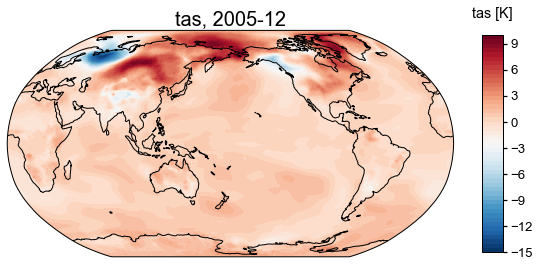

In [3]:
fd_tas_anom = fd_tas.get_anom(ref_period=[1951, 1980])
fig, ax = fd_tas_anom.plot(it=-1)

## Annualize a `ClimateField`

In [5]:
fd_tas.time

array([ 850.        ,  850.08493151,  850.16164384, ..., 2005.74794521,
       2005.83287671, 2005.91506849])

In [6]:
fd_tas_djf = fd_tas.annualize(months=[12, 1, 2])

[ 850  851  852 ... 2004 2005 2006]


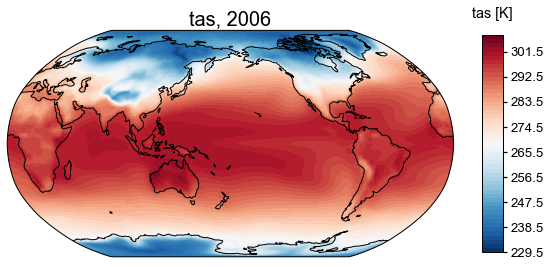

In [7]:
print(fd_tas_djf.time)
fig, ax = fd_tas_djf.plot(it=-1)

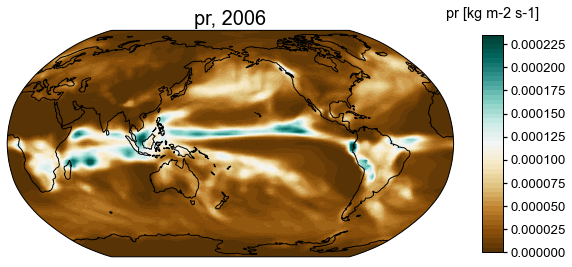

In [8]:
fd_pr_djf = fd_pr.annualize(months=[12, 1, 2])
fig, ax = fd_pr_djf.plot(it=-1)

## Regrid a `ClimateField`

In [9]:
fd_tas.da.coords

Coordinates:
  * time     (time) object 0850-01-17 00:00:00 ... 2005-12-17 00:00:00
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

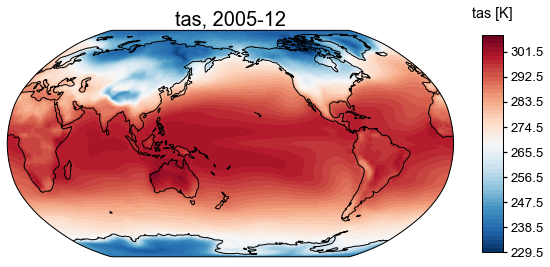

In [10]:
fig, ax = fd_tas.plot(it=-1)

In [12]:
fd_regrid = fd_tas.regrid(np.arange(-90, 90.1, 5), np.arange(0, 360, 5))
fd_regrid.da.coords

Coordinates:
  * time     (time) object 0850-01-17 00:00:00 ... 2005-12-17 00:00:00
  * lon      (lon) int64 0 5 10 15 20 25 30 35 ... 325 330 335 340 345 350 355
  * lat      (lat) float64 -90.0 -85.0 -80.0 -75.0 -70.0 ... 75.0 80.0 85.0 90.0

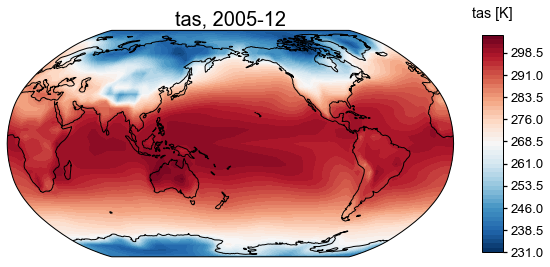

In [13]:
fig, ax = fd_regrid.plot(it=-1)